In [14]:
%load_ext autoreload 
%autoreload 2

import os
import math
import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import importlib
import model as md
import view as vw

importlib.reload(md)
importlib.reload(vw)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'view' from 'c:\\Users\\Артем\\Desktop\\Вуз\\Аспирантура\\Диссертация\\Алгоритм\\Relaxation_frequency_phase_algorithm\\view\\__init__.py'>

In [15]:
dir = os.getcwd()
U_path = os.path.join(dir, "data","real", "RTB2004_CHAN1.csv")
I_path= os.path.join(dir, "data","real", "RTB2004_CHAN2.csv")

t,U = md.make_real_data_list(U_path)
t,I = md.make_real_data_list(I_path)

In [16]:
F,V = md.get_spectrum3(t,U)
F_peak_calc = F[np.argmax(V)]
T=1/F_peak_calc

T_counts=md.convert_to_counts(t,T)
window=T_counts*8

fs = 1 / np.mean(np.diff(t))
 
vw.show_I_U_3(t,I,U,0,window)


In [17]:
t_f, U_f=md.filter_elliptic_bandpass  (t,U,F_peak_calc,230e3,7)
t_f, I_f=md.filter_elliptic_bandpass(t,I,F_peak_calc,230e3,7)

vw.show_I_U_3(t_f,I_f, U_f,0,window)

In [18]:
time_maxpoint,phase_maxpoint=md.get_phase_maxpoint(t_f,U_f,I_f,F_peak_calc)
vw.show_one_graph(time_maxpoint,phase_maxpoint)


75000


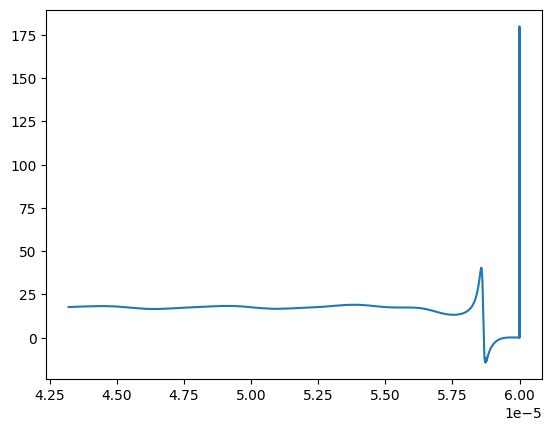

In [19]:
time_hilbert, phase_hilbert=md.get_phase_hilbert(t_f, U_f, I_f, fs)
print(len(phase_hilbert))
vw.plot(time_hilbert, phase_hilbert,None,48000)

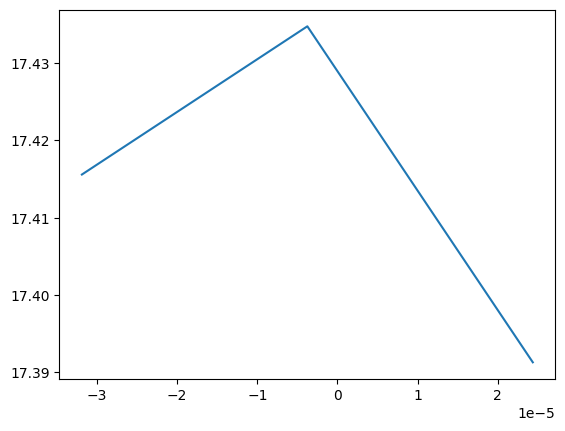

In [20]:
time_FFT, phase_FFT = md.get_phase_FFT(t_f,U_f, I_f, F_peak_calc, n_periods=25, overlap=0.5)
plt.plot(time_FFT, phase_FFT)

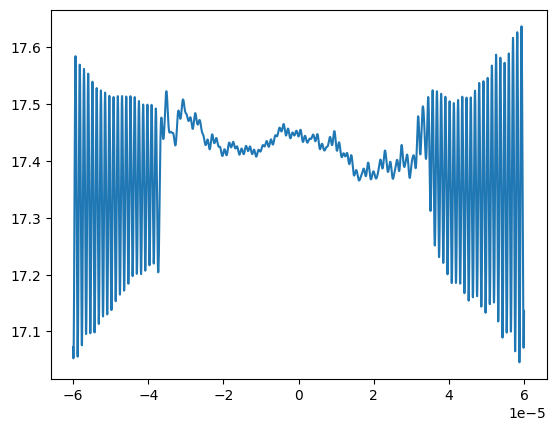

In [21]:
time_lockin, phase_lockin = md.get_phase_lockin(t_f,U_f, I_f, F_peak_calc,20)
plt.plot(time_lockin,phase_lockin)

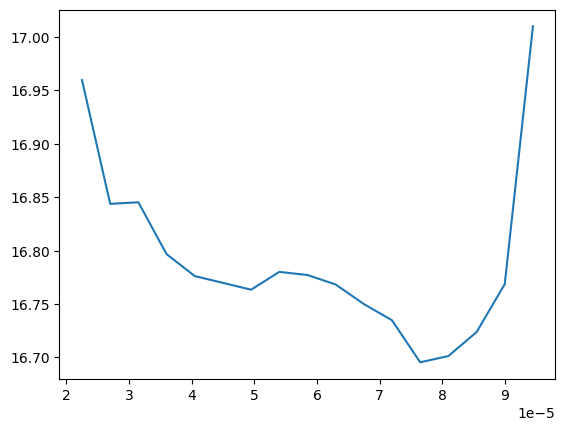

In [22]:
time_xcorr,phasse_xcorr = md.get_phase_xcorr2(t_f,U_f, I_f, F_peak_calc,20,0.9)
plt.plot(time_xcorr,phasse_xcorr)

In [23]:
phase=md.get_phase_RC_real(F_peak_calc,128.35,870.67e-12)
F_rel=md.get_F_rel(phase,F_peak_calc)
print(phase)
print(format(F_rel, ".2e"))

17.331380893445917
1.42e+06


In [24]:
md.print_full_stats(F_peak_calc, phase_maxpoint,phase_hilbert,phase_FFT,phase_lockin,phasse_xcorr)

Array 1: Mean phase = 17.9760, KDE mode phase = 17.4100
Array 1: Mean Frel = 1369808.6347, KDE mode Frel = 1417359.8441
Array 2: Mean phase = 17.1803, KDE mode phase = 17.4104
Array 2: Mean Frel = 1437519.9136, KDE mode Frel = 1417322.8072
Array 3: Mean phase = 17.4139, KDE mode phase = 17.4178
Array 3: Mean Frel = 1417021.5162, KDE mode Frel = 1416682.3229
Array 4: Mean phase = 17.3928, KDE mode phase = 17.4287
Array 4: Mean Frel = 1418845.7504, KDE mode Frel = 1415740.3682
Array 5: Mean phase = 16.7919, KDE mode phase = 16.7643
Array 5: Mean Frel = 1472822.3238, KDE mode Frel = 1475394.5113
